In [1]:
import os
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show as rasterio_show
from shapely.geometry import box

os.environ['GDAL_FILENAME_IS_UTF8'] = 'NO'
os.environ['SHAPE_ENCODING'] = "utf-8"
os.environ['CPL_ZIP_ENCODING'] = "UTF-8"

# 1. Defining Parameters

In [2]:
TARGET_CRS = "EPSG:31983"

CUT_PATH = r".\Cut_data"
GRAPH_PATH = r".\Raw_graph"
DTM_PATH = os.path.join(CUT_PATH, "dtm.tif")
ALAG_PATH = os.path.join(CUT_PATH, "Alagamentos_2019.shp")
RIO_PATH = os.path.join(CUT_PATH, "tamanduatei.shp")
AF_PATH = os.path.join(CUT_PATH, "afluentes.shp")
REDE_GPKG = os.path.join(GRAPH_PATH, "raw_street_graph.gpkg")

# 2. Loading and Reprojecting Data

In [3]:
def load_and_reproject(path, target_crs, **kwargs):
    """
    Load vectors and reproject them to the desired CRS.
    """
    gdf = gpd.read_file(path, **kwargs)

    if gdf.crs and gdf.crs != target_crs:
        print(f"Reprojecting {os.path.basename(path)} from {gdf.crs} to {target_crs}...")
        return gdf.to_crs(target_crs)
    return gdf

In [4]:
alagamentos = load_and_reproject(ALAG_PATH, TARGET_CRS)
rios = load_and_reproject(RIO_PATH, TARGET_CRS)
afluentes = load_and_reproject(AF_PATH, TARGET_CRS)
edges = load_and_reproject(REDE_GPKG, TARGET_CRS, layer='edges')
nodes = load_and_reproject(REDE_GPKG, TARGET_CRS, layer='nodes')

Reprojecting raw_street_graph.gpkg from EPSG:4326 to EPSG:31983...
Reprojecting raw_street_graph.gpkg from EPSG:4326 to EPSG:31983...


# 3. Graph Visualization

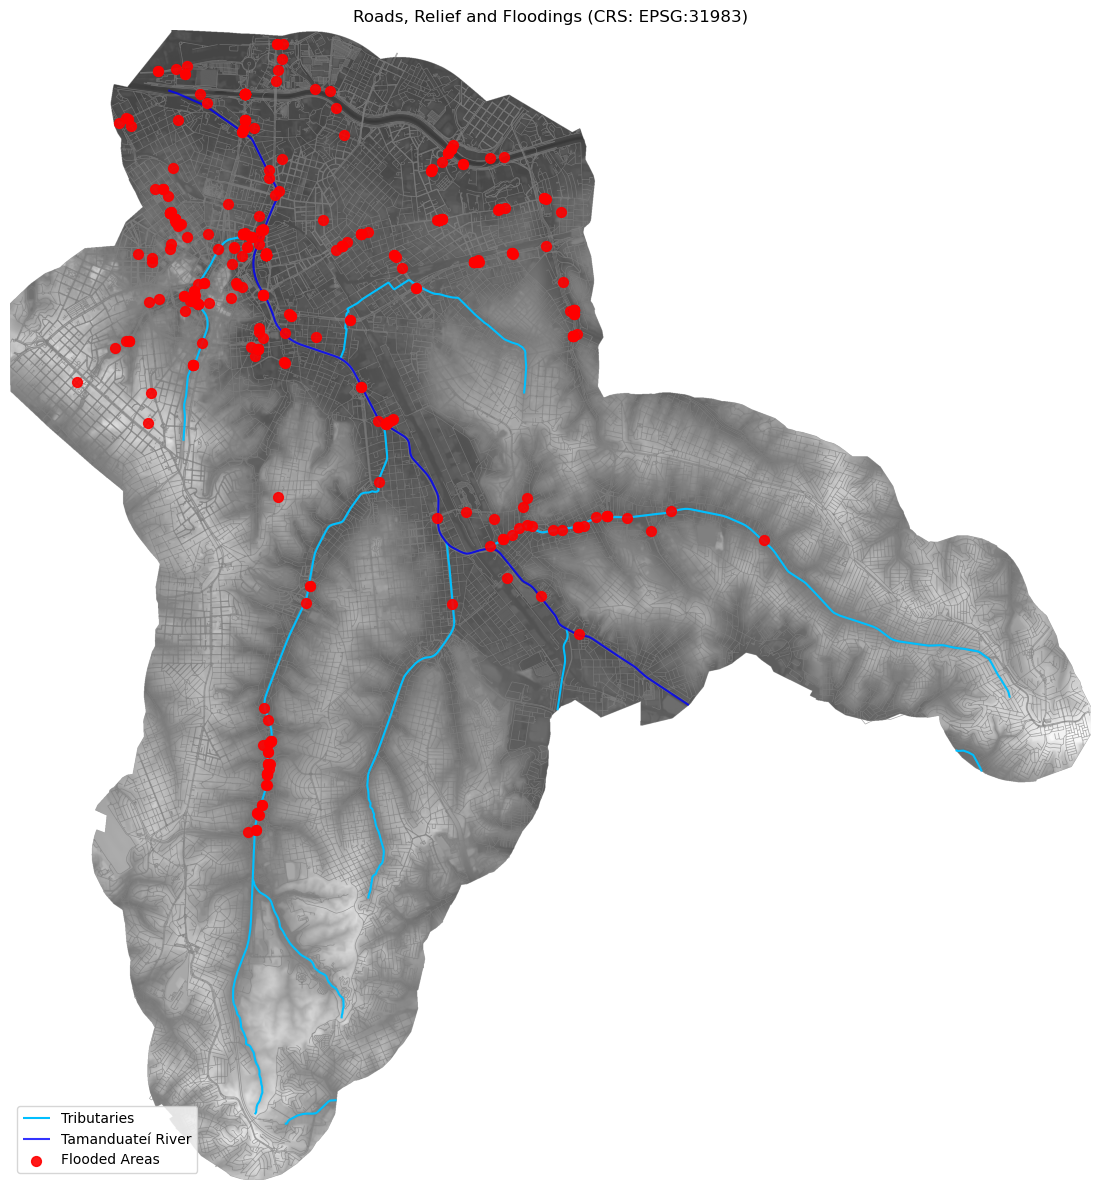

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))

with rasterio.open(DTM_PATH) as src:
    rasterio_show(src, ax=ax, cmap='gray', alpha=0.8, zorder=1)

edges.plot(ax=ax, linewidth=0.5, color='#808080', alpha=0.7, zorder=3)
rios.plot(ax=ax, linewidth=1.5, color='#00BFFF', alpha=1.0, zorder=4, label="Tributaries")
afluentes.plot(ax=ax, linewidth=1.5, color='#0000FF', alpha=0.8, zorder=5, label="Tamanduateí River")
alagamentos.plot(ax=ax, markersize=50, color='red', marker='o', alpha=0.9, zorder=6, label="Flooded Areas")


ax.set_title(f"Roads, Relief and Floodings (CRS: {TARGET_CRS})")
ax.set_aspect('equal')
ax.set_axis_off()
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

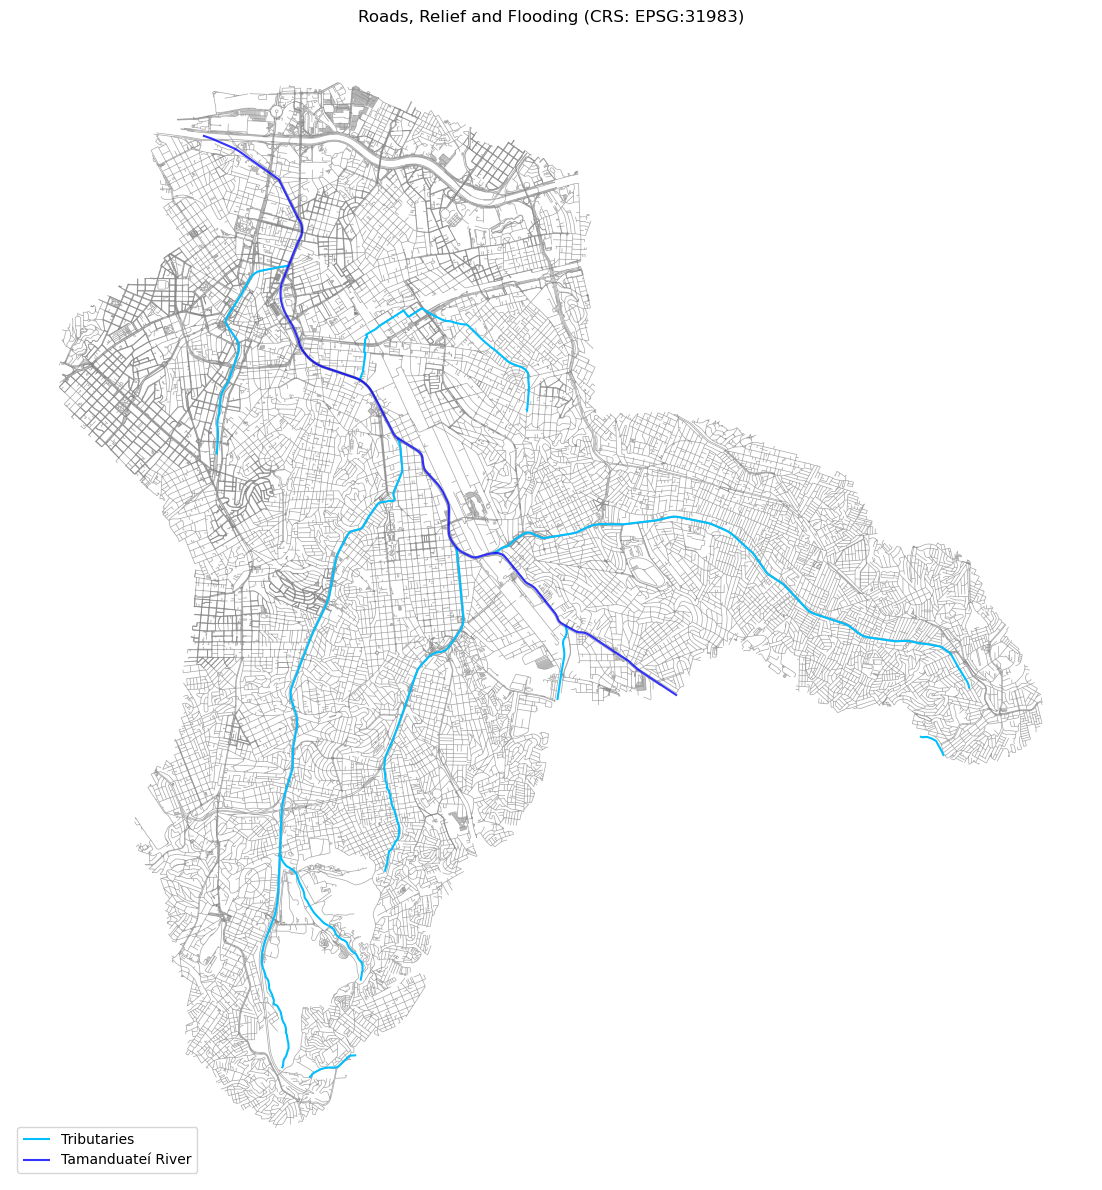

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))

edges.plot(ax=ax, linewidth=0.5, color='#808080', alpha=0.7, zorder=3)

rios.plot(ax=ax, linewidth=1.5, color='#00BFFF', alpha=1.0, zorder=4, label="Tributaries")
afluentes.plot(ax=ax, linewidth=1.5, color='#0000FF', alpha=0.8, zorder=5, label="Tamanduateí River")


ax.set_title(f"Roads, Relief and Flooding (CRS: {TARGET_CRS})")
ax.set_aspect('equal')
ax.set_axis_off()
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()